## K-Mean Clustering

K-Means clustering is an unsupervised method of dimensionality reduction or clustering. For the demonstrtion purposes here, we will be exploring the clustering abilities of K-means. K-means clustering works as follows. First, for a given number of means $k$, $k$ random points (centers) are selected for starting. Then, every other point is assigned to the nearest center. Next, as new center is placed at the mean of each of these $k$ groups. Finally, the clustering and recentering procedure is repeated until convergence. The following image describes a K-means cluster with k=2 in two steps. Notice that the starting point is chosen randomly and possibly not efficiently.

<p align="center">
    <img src="Kmeans.png" width="500">
</p>

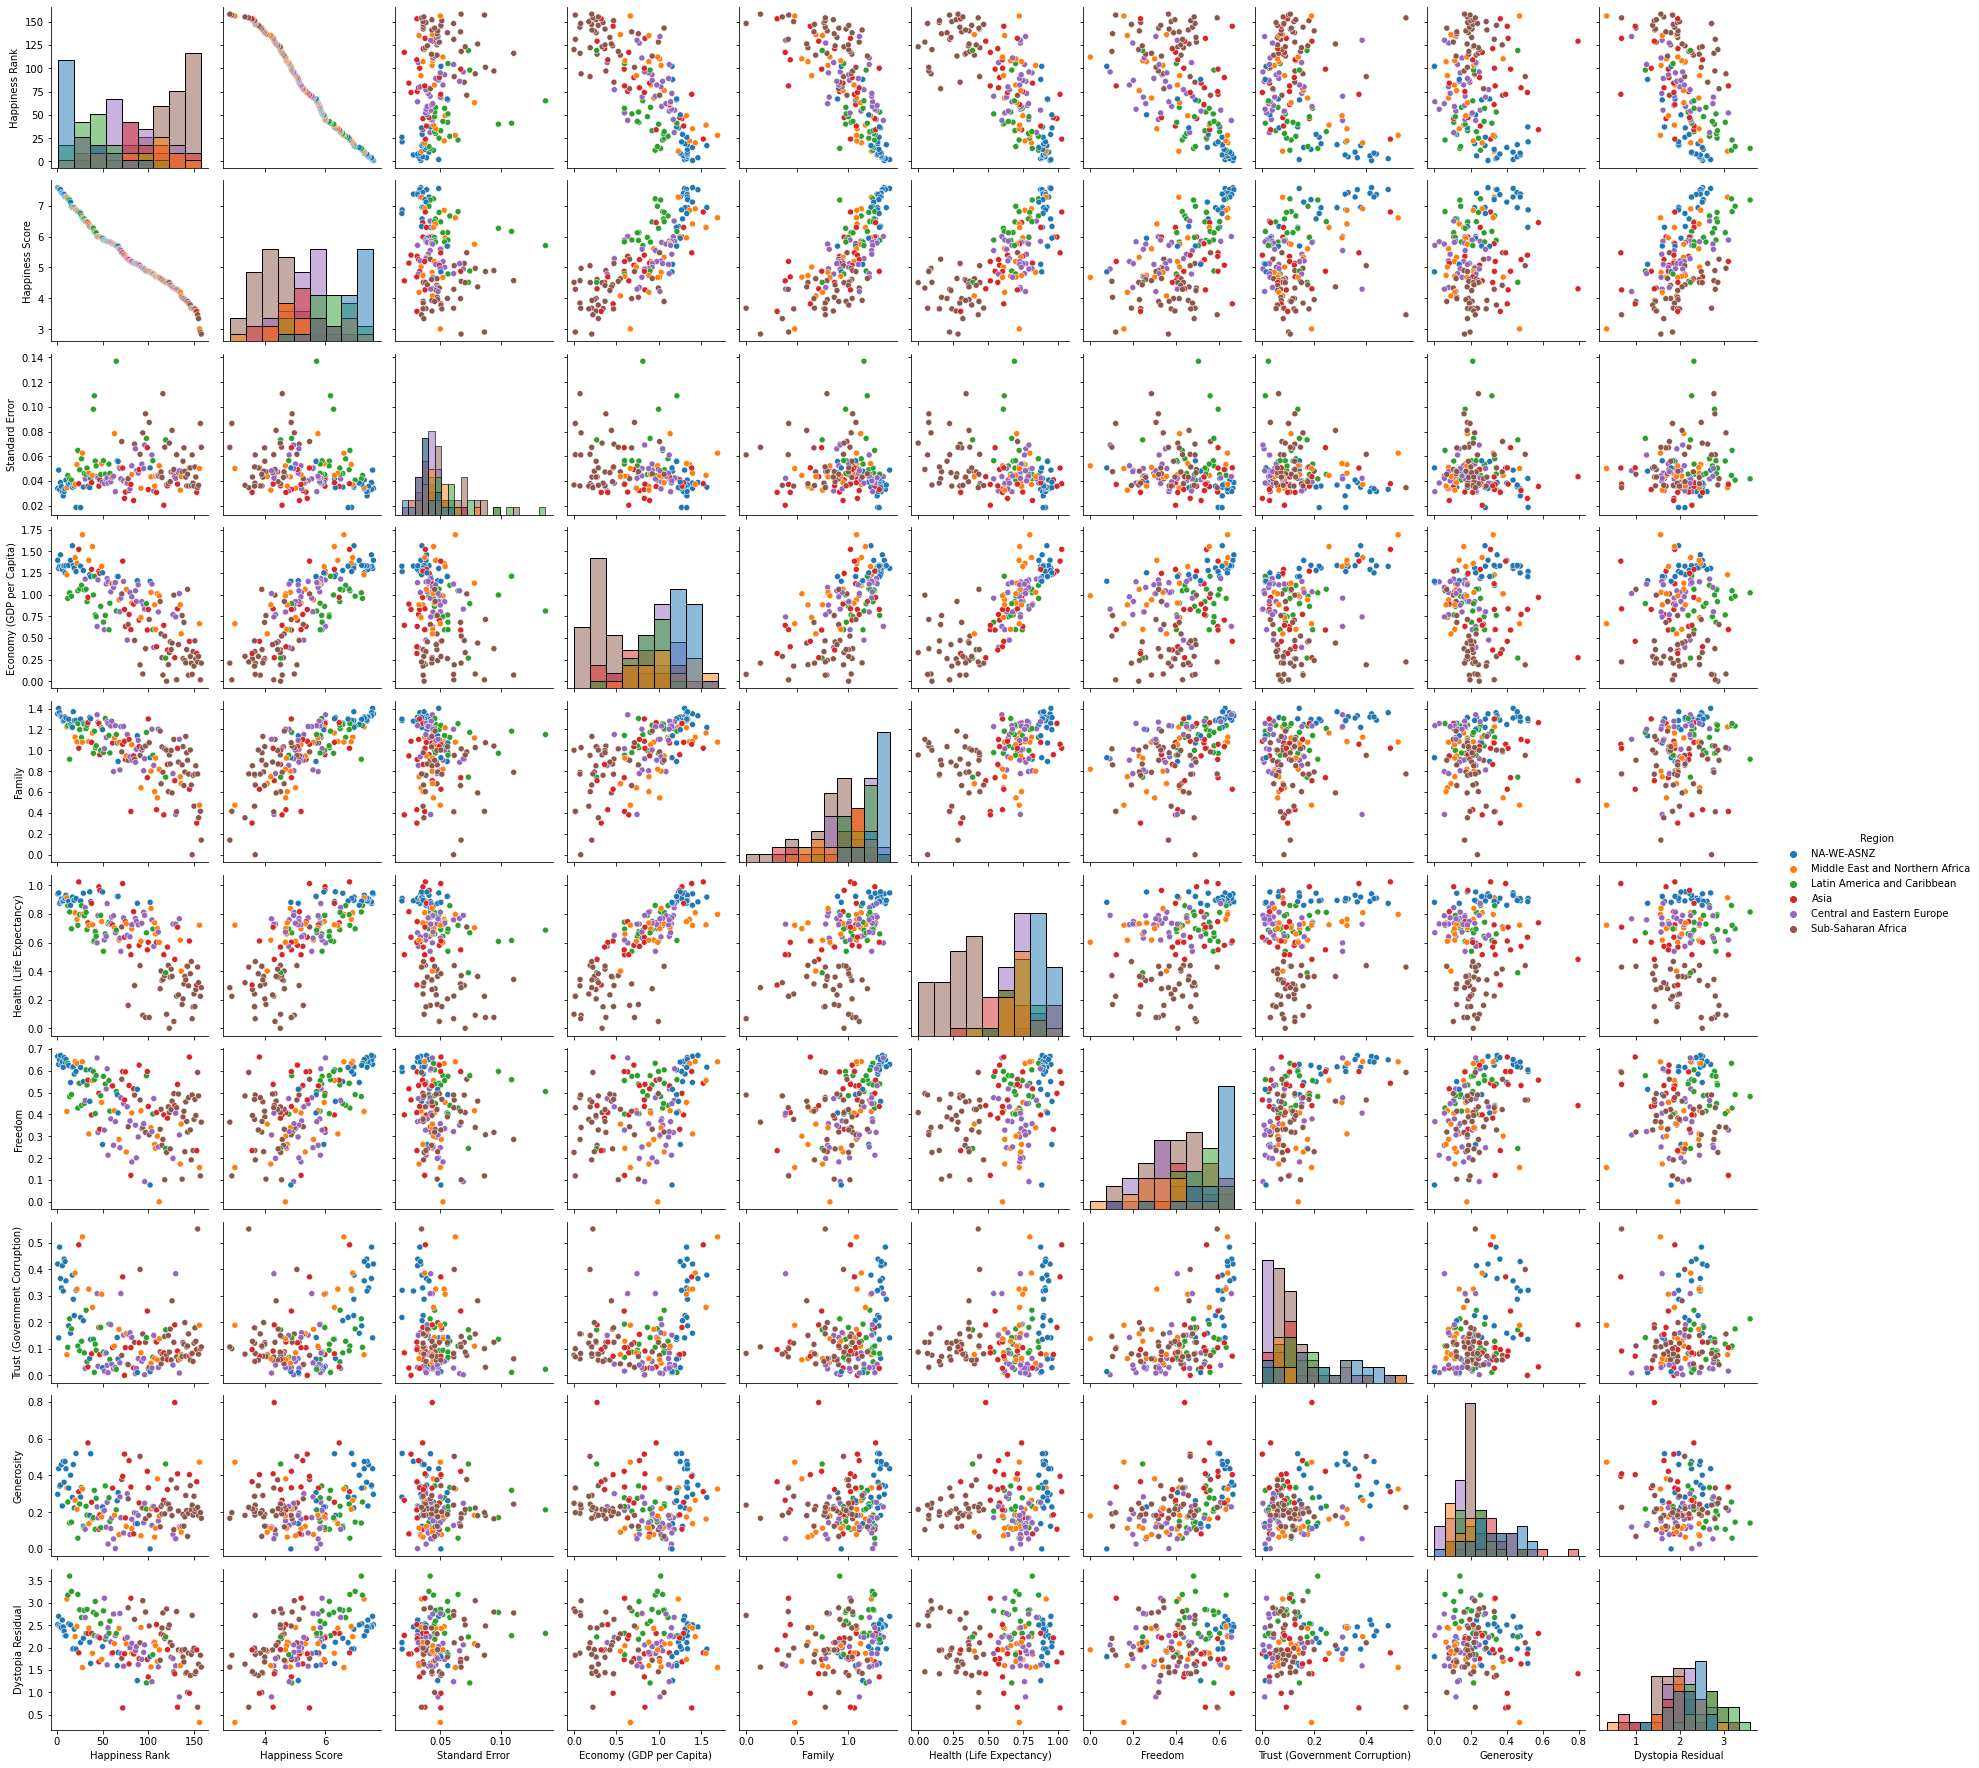

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd

df = pd.read_csv("2015.csv")
X = df[["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"]]
df.replace("Eastern Asia", "Asia", inplace = True)
df.replace("Southeastern Asia", "Asia", inplace = True)
df.replace("Southern Asia", "Asia", inplace = True)
df.replace("North America", "NA-WE-ASNZ", inplace = True)
df.replace("Western Europe", "NA-WE-ASNZ", inplace = True)
df.replace("Australia and New Zealand", "NA-WE-ASNZ", inplace = True)
y = df[["Region"]]
X = X.values
y = y.values
sns.pairplot(df.drop(columns=["Country"]), hue="Region", diag_kind="hist")


The data to be used for classification consists of happiness scores with economy satisfaction, family satisfaction, life expectancy, freedom, govenrmental trust, and generosity components. These are all in the form of continuous values. Additionally, for the purpose of clustering, I am using the region as a categorical response label. I have modified the regions from their original reporting as obtained via Kaggle in order to make more even the size of distinct class labels. With this being said, there are still more sub-saharan african nations than any other group.

In [51]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

def assign_label(i, X, centroids):
    distances = np.array([distance(X[i,], np.array(centroid)) for centroid in centroids])
    label = np.argmin(distances)
    return label 

def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(X.shape[0])]

def update_centers(X, centroids):
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    center_means = {i : np.zeros(shape=(X.shape[1])) for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]] += X[i,]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i] = center_means[i]/num_occur
    
    return [center_means[i] for i in center_means]

In [85]:
def k_means_clustering(X, k, max_iter = 100):
    centroids = []
    for j in range(k):
        i = np.random.randint(0, X.shape[0])
        centroids.append(X[i,])
    
    for _ in range(max_iter):
        centroids = update_centers(X, centroids)

    return centroids

def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    elif y == 2:
        return "magenta"
    elif y == 3:
        return "yellow"
    elif y ==4:
        return "brown"
    elif y ==5:
        return "blue"
    else:
        return "yellow"

c = [colors(label) for label in y]

Based on the pairplot at the beginning of the notebook, the k-means clustering will be performed on the Economy and Happiness score values for each country. I have chosen these two variables because they appeared to have enough seperation to allow for the creation of discrete clusters. 

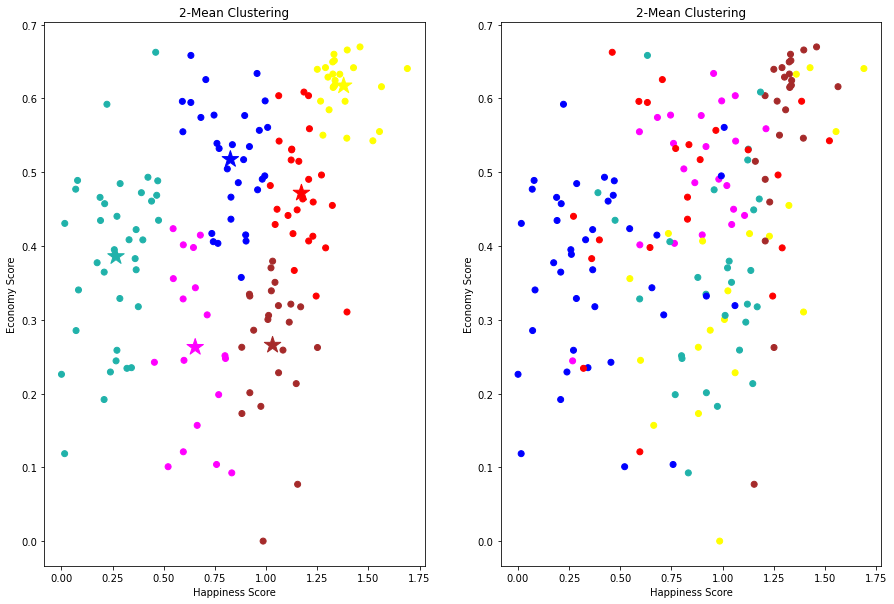

In [99]:
centroids = k_means_clustering(X[:,[1,4]], np.unique(y).shape[0])
current_labels = assign_clusters(X[:,[1,4]], centroids)
current_colors = [colors(label) for label in current_labels]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:,1], X[:,4], color = current_colors)
ax1.set_title("2-Mean Clustering")
ax1.set_ylabel("Economy Score")
ax1.set_xlabel("Happiness Score")
ax1.scatter([centroids[i][0] for i in range(len(centroids))], [centroids[i][1] for i in range(len(centroids))], s = 300, marker = "*", color = [colors(i) for i in range(len(centroids))])
ax2.scatter(X[:,1], X[:,4], color = [colors(y) for y in np.unique(y, return_inverse=True)[1]])
ax2.set_title("2-Mean Clustering")
ax2.set_ylabel("Economy Score")
ax2.set_xlabel("Happiness Score")
plt.show()

The above plots demonstrate the predicted and true clusters respectively of the happiness and economy scores for various countries. The plot on the left is the predicted cluster which, as expected, has roughly equal size for all clusters and the right are the true clusters in the data. Based on the plots, our K-means implmentation did a fair job of determining the clusters within the data with the exception of the two overlapping bottom right clusters which itccombined into a single cluster. Note that the colors do not correspond between plots. With the noted drawback of poor performance on unequally sized clusters, we can see that K-means is an effective unsupervised method for identifying clusters in data. 